In [6]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../dataset/real_estate/real_estate.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<Axes: >

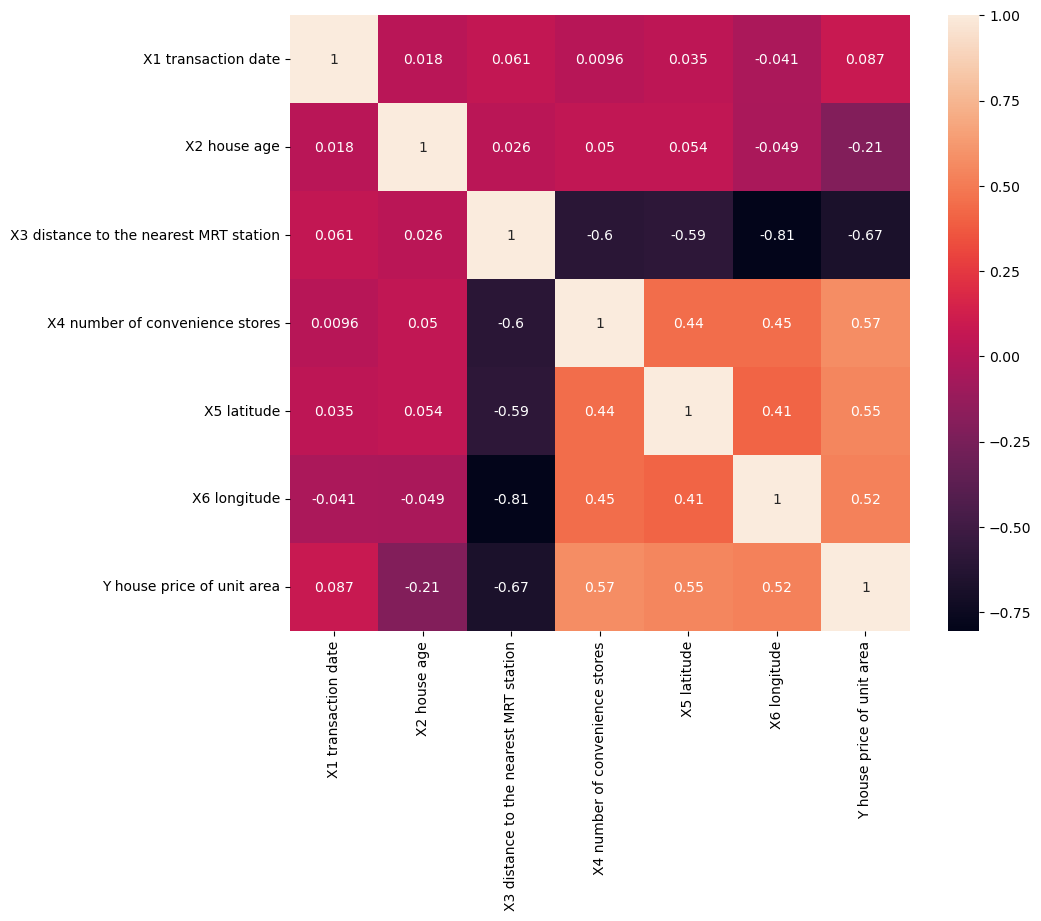

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [11]:
from sklearn.model_selection import train_test_split
y_text = 'Y house price of unit area'
X = df.drop(y_text, axis=1)
y = df[y_text]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1337) 

In [12]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(train_X, train_y)

LinearRegression()

In [13]:
pred_y = sk_model.predict(test_X)

In [14]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error, mean_absolute_error

mape = mean_absolute_percentage_error(pred_y, test_y)
r2 = r2_score(pred_y, test_y)
mse = mean_squared_error(pred_y, test_y)
mae = mean_absolute_error(pred_y, test_y)

print(f"MAPE: {mape},\n r2: {r2},\n MSE: {mse},\n MAE: {mae}")

MAPE: 0.3074174396888632,
 r2: 0.3267676531416768,
 MSE: 75.72153085143991,
 MAE: 6.405716013113549


Text(0.5, 0, 'Actual values')

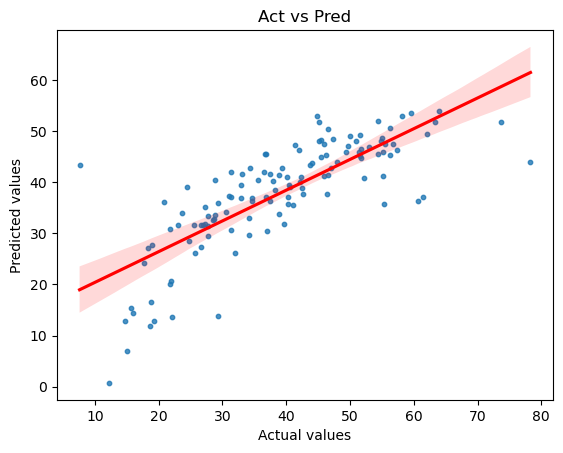

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Act vs Pred')
fig = sns.regplot(x=test_y, y=pred_y, scatter_kws={'s':10}, line_kws={'color':'r'})
plt.ylabel('Predicted values')
plt.xlabel('Actual values')

In [16]:
import xgboost as xgb

In [17]:
xgb_model = xgb.XGBRegressor(objective ='reg:linear', verbosity = 0, seed = 1337) 

In [18]:
xgb_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [19]:
xgb_y_pred = xgb_model.predict(test_X)

In [20]:
mape = mean_absolute_percentage_error(xgb_y_pred, test_y)
r2 = r2_score(xgb_y_pred, test_y)
mse = mean_squared_error(xgb_y_pred, test_y)
mae = mean_absolute_error(xgb_y_pred, test_y)

print(f"MAPE: {mape},\n r2: {r2},\n MSE: {mse},\n MAE: {mae}")

MAPE: 0.1373467356718213,
 r2: 0.6401627010650783,
 MSE: 54.61777694821323,
 MAE: 5.086139794921874


Text(0.5, 0, 'Actual values')

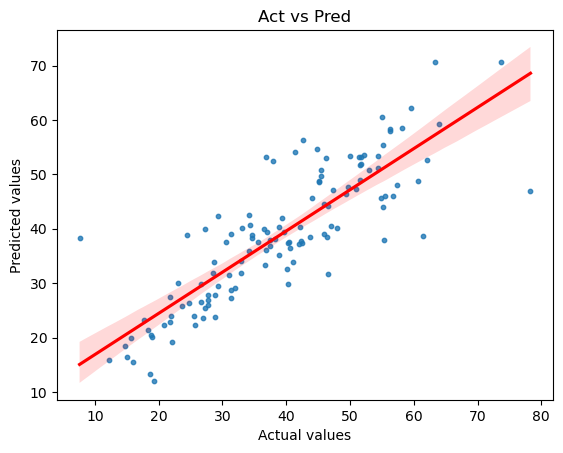

In [21]:
plt.title('Act vs Pred')
fig = sns.regplot(x=test_y, y=xgb_y_pred, scatter_kws={'s':10}, line_kws={'color':'r'})
plt.ylabel('Predicted values')
plt.xlabel('Actual values')